In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [3]:
def load_test_set(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        test_data = f.readlines()
    return test_data

labelised = True

if(labelised):
    data_test = load_test_set("test_label.txt")
    rows = []
    for data in data_test:
        label, text = data.split(',',1)
        rows.append({'label': label, 'text': text})
else:
    data_test = load_test_set("test_shuffle.txt")
    rows = []
    for data in data_test:
        rows.append({'text': data})

df_test = pd.DataFrame(rows)
df_train = pd.read_csv('train.csv')

In [4]:
df_train = df_train.sample(frac=1, random_state=42)
df_train.reset_index(drop=True, inplace=True)

In [5]:
df_train

,label,text
0,Education,Its goal is to overcome the challenges posed b...
1,Fashion,Although the fashion industry developed first ...
2,Science,This theory uses only three of Aristotle's fou...
3,Fashion,Fashion trends\nMain article: Fashion trend\nS...
4,Entertainment,Psychologists say the function of media entert...
...,...,...
5409,Politics,"However, many political parties have no ideolo..."
5410,Travel,Since every country imposes different travel r...
5411,Travel,Please help improve this section by adding cit...
5412,Travel,This issue cannot be understood without the fi...


In [6]:
X_train = df_train['text']
y_train = df_train['label']
X_test = df_test['text']
y_test = df_test['label']

In [7]:

# Create a CountVectorizer to convert text into a matrix of token counts
vectorizer = CountVectorizer(stop_words='english')

# Fit the vectorizer to the training data and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the testing data using the same vectorizer
X_test_vectorized = vectorizer.transform(X_test)


In [8]:

# Multinomial Naive Bayes
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

predictions = classifier.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.6771929824561403


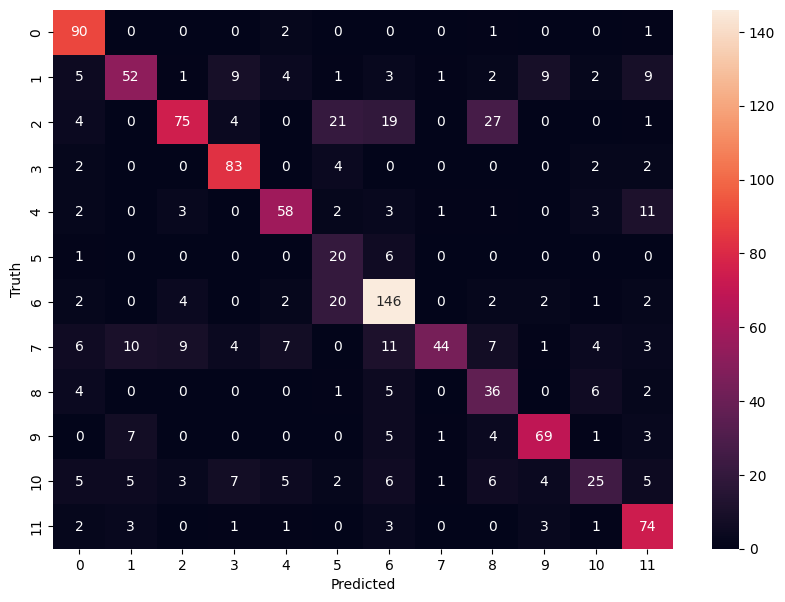

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [20]:
df_test['label'] = predictions
df_test.head()
df_test.drop('text', axis=1, inplace=True)
df_test['ID'] = df_test.index
df_test = df_test[['ID', 'label']]
df_test.to_csv('bagofwords.csv', index=False)